In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv("amazon.csv",encoding='iso-8859-1')

In [13]:
df.head(3)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01


In [14]:
df.tail(3)

,year,state,month,number,date
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [15]:
df.shape

(6454, 5)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [18]:
df.duplicated().any()

True

In [21]:
df=df.drop_duplicates()

In [22]:
df.duplicated().any()

False

In [23]:
df.isnull().any()

year      False
state     False
month     False
number    False
date      False
dtype: bool

In [26]:
df.describe(include="all")

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01
freq,NaN,697,540,NaN,324
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN
50%,2007.000000,NaN,NaN,24.497000,NaN
75%,2012.000000,NaN,NaN,114.000000,NaN


In [29]:
df['month'].unique()

array(['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [30]:
df['Month']=df['month'].map({'Janeiro':"January",
                            'Fevereiro':"Feburary",
                            'Março':"March", 'Abril':"April", 'Maio':"May", 'Junho':"June", 'Julho':"July",
       'Agosto':"August", 'Setembro':"September", 'Outubro':"October", 'Novembro':"November", 'Dezembro':"December"})

C:\Users\Hp\AppData\Local\Temp\ipykernel_14560\1933153530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month']=df['month'].map({'Janeiro':"January",


In [38]:
df=df.drop(columns={"month"})

In [39]:
df

,year,state,number,date,Month
0,1998,Acre,0.0,1998-01-01,January
1,1999,Acre,0.0,1999-01-01,January
2,2000,Acre,0.0,2000-01-01,January
3,2001,Acre,0.0,2001-01-01,January
4,2002,Acre,0.0,2002-01-01,January
...,...,...,...,...,...
6449,2012,Tocantins,128.0,2012-01-01,December
6450,2013,Tocantins,85.0,2013-01-01,December
6451,2014,Tocantins,223.0,2014-01-01,December
6452,2015,Tocantins,373.0,2015-01-01,December


In [40]:
df.shape

(6422, 5)

In [47]:
df.groupby("Month")['number'].sum().sort_values(ascending=False)

Month
July         92319.113
October      88681.579
August       88050.435
November     85508.054
September    58578.305
December     57535.480
June         55997.675
January      47681.844
May          34725.363
Feburary     30839.050
March        30709.405
April        28184.770
Name: number, dtype: float64

In [49]:
df.groupby("year")['number'].sum().sort_values(ascending=False)

year
2003    42760.674
2016    42212.229
2015    41208.292
2012    40084.860
2014    39621.183
2009    39116.178
2004    38450.163
2002    37390.600
2010    37037.449
2017    36619.624
2013    35137.118
2005    35004.965
2011    34633.545
2006    33824.161
2007    33028.413
2008    29378.964
2001    29054.612
2000    27351.251
1999    26882.821
1998    20013.971
Name: number, dtype: float64

In [50]:
df.groupby("state")['number'].sum().sort_values(ascending=False)

state
Mato Grosso         96246.028
Paraiba             52426.918
Sao Paulo           51121.198
Rio                 45094.865
Bahia               44746.226
Piau                37803.747
Goias               37695.520
Minas Gerais        37475.258
Tocantins           33707.885
Amazonas            30650.129
Ceara               30428.063
Maranhao            25129.131
Pará                24512.144
Pernambuco          24498.000
Roraima             24385.074
Santa Catarina      24359.852
Amapa               21831.576
Rondonia            20285.429
Acre                18464.030
Espirito Santo       6546.000
Alagoas              4606.000
Distrito Federal     3561.000
Sergipe              3237.000
Name: number, dtype: float64

In [63]:
data1=df[df['state']=='Amazonas']

In [67]:
data2=data1.groupby("year")['number'].sum()

In [68]:
data2.sort_values(ascending=False)

year
2002    2852.000
2008    2717.000
2014    2385.909
2010    2324.508
2004    2298.207
2016    2060.972
2005    1657.128
2011    1652.538
2003    1524.268
2009    1320.601
2001    1297.000
2015    1189.994
2012    1110.641
1999    1061.000
2006     997.640
1998     946.000
2017     906.905
2013     905.217
2000     853.000
2007     589.601
Name: number, dtype: float64

In [70]:
data3.sort_values(ascending=False)

date
2002-01-01    2852.000
2008-01-01    2717.000
2014-01-01    2385.909
2010-01-01    2324.508
2004-01-01    2298.207
2016-01-01    2060.972
2005-01-01    1657.128
2011-01-01    1652.538
2003-01-01    1524.268
2009-01-01    1320.601
2001-01-01    1297.000
2015-01-01    1189.994
2012-01-01    1110.641
1999-01-01    1061.000
2006-01-01     997.640
1998-01-01     946.000
2017-01-01     906.905
2013-01-01     905.217
2000-01-01     853.000
2007-01-01     589.601
Name: number, dtype: float64

In [84]:
x=df[df['year']==2015].groupby("Month")['number'].sum().reset_index()

In [85]:
x

,Month,number
0,April,2573.000
1,August,4363.125
2,December,4088.522
3,Feburary,2309.000
4,January,4635.000
5,July,4364.392
6,June,3260.552
7,March,2202.000
8,May,2384.000
9,November,4034.518


<Axes: xlabel='Month', ylabel='number'>

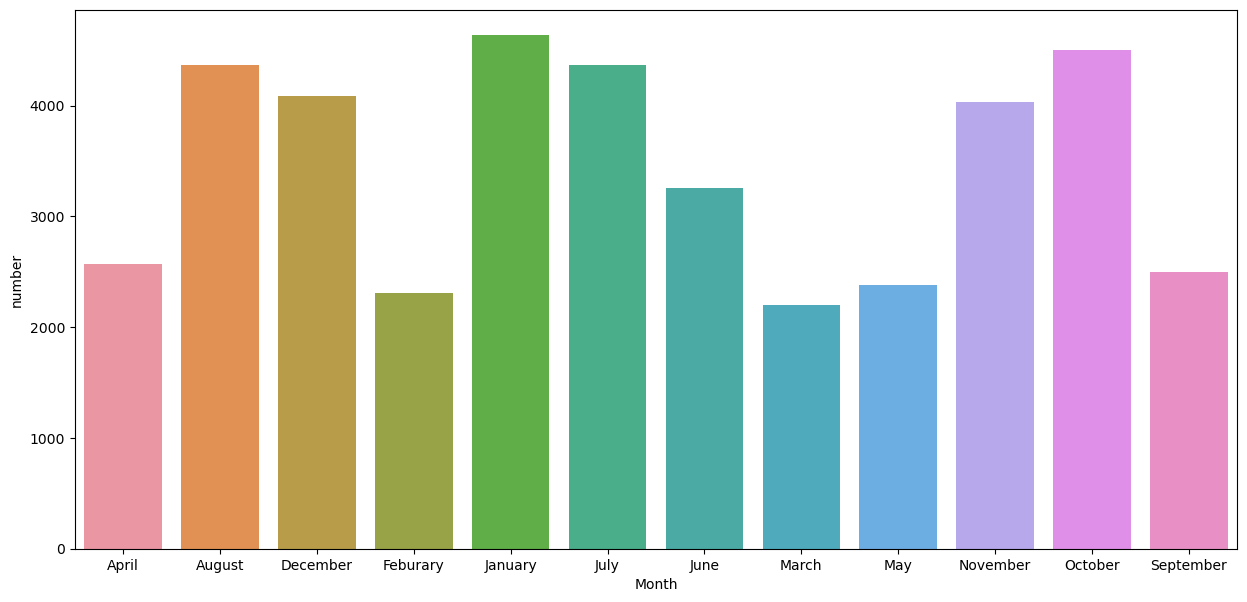

In [93]:
plt.figure(figsize=(15,7))
sns.barplot(x="Month",y="number",data=x)

In [98]:
df.groupby("state")['number'].mean().sort_values(ascending=False)

state
Sao Paulo           213.896226
Mato Grosso         203.479975
Bahia               187.222703
Piau                158.174674
Goias               157.721841
Minas Gerais        156.800243
Tocantins           141.037176
Amazonas            128.243218
Ceara               127.314071
Paraiba             111.073979
Maranhao            105.142808
Pará                102.561272
Pernambuco          102.502092
Roraima             102.029598
Santa Catarina      101.924067
Amapa                91.345506
Rondonia             84.876272
Acre                 77.255356
Rio                  64.698515
Espirito Santo       27.389121
Alagoas              19.271967
Distrito Federal     14.899582
Sergipe              13.543933
Name: number, dtype: float64

In [107]:
df[df['Month']=="December"]['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)